#Connect to Big Query

In [21]:
#libraries
from google.cloud import bigquery
from google.colab import auth

# authneticate
auth.authenticate_user()

#initialising client BigQuery
project_id='instant-shard-427518-f8'
client=bigquery.Client(project=project_id, location='US')

In [22]:
#get dataset and table
dataset_ref=client.dataset('employeedata', project=project_id)
dataset = client.get_dataset(dataset_ref)
table_ref=dataset.table('tbl_hr_data')
table=client.get_table(table_ref)
nw_table_ref=dataset.table('tbl_new_employees')
new_table=client.get_table(nw_table_ref)
table.schema
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [23]:
#convert to dataframe
df= client.list_rows(table).to_dataframe()
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.36             0.56               2                   132   
1                0.74             0.99               2                   277   
2                0.45             0.53               2                   155   
3                0.40             0.53               2                   151   
4                0.36             0.51               2                   155   

   time_spend_company  Work_accident  Quit_the_Company  promotion_last_5years  \
0                   3              0                 1                      0   
1                   3              0                 1                      0   
2                   3              0                 1                      0   
3                   3              0                 1                      0   
4                   3              0                 1                      0   

  Departments  salary employee_id  
0          IT  medium    EMP00064  
1          IT  medium    EMP00071  
2          IT     low    EMP00142  
3          IT     low    EMP00215  
4          IT     low    EMP00216

In [24]:
#convert to dataframe
df2= client.list_rows(new_table).to_dataframe()
df2.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.331690         0.847953               6                   151   
1            0.468434         0.169659               5                   303   
2            0.858448         0.918311               4                   162   
3            0.056211         0.322600               2                   229   
4            0.382648         0.434348               4                   260   

   time_spend_company  Work_accident  Quit_the_Company  promotion_last_5years  \
0                   4              0                 0                      0   
1                   4              0                 0                      0   
2                   6              1                 0                      0   
3                   5              1                 0                      0   
4                   3              1                 0                      0   

  Departments salary employee_id  
0          IT    low     NE15014  
1          IT    low     NE15015  
2          IT    low     NE15064  
3          IT    low     NE15086  
4          hr    low     NE15021

#BUILD MODEL

##install Pycaret

In [25]:
!pip install pycaret

#Code and Train Model

In [26]:
# get our model
from pycaret.classification import *

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         14999 non-null  Int64  
 3   average_montly_hours   15004 non-null  Int64  
 4   time_spend_company     14999 non-null  Int64  
 5   Work_accident          15000 non-null  Int64  
 6   Quit_the_Company       15004 non-null  Int64  
 7   promotion_last_5years  15004 non-null  Int64  
 8   Departments            15004 non-null  object 
 9   salary                 15004 non-null  object 
 10  employee_id            15004 non-null  object 
dtypes: Int64(6), float64(2), object(3)
memory usage: 1.3+ MB


In [28]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'Quit_the_Company', 'promotion_last_5years', 'Departments', 'salary',
       'employee_id'],
      dtype='object')

In [29]:
#setup for model
setup(df, target='Quit_the_Company',
      session_id=123,
      ignore_features=['employee_id'],
      categorical_features=['Departments', 'salary'])

In [14]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [15]:
rf_model = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
final_df=predict_model(rf_model)

In [17]:
final_df.head()

satisfaction_level  last_evaluation  number_project  \
6949                0.42             0.56               2   
3760                0.62             0.52               3   
3460                0.37             0.45               2   
5785                0.78             0.98               5   
697                 0.36             0.62               4   

      average_montly_hours  time_spend_company  Work_accident  \
6949                   143                   3              0   
3760                   148                   3              0   
3460                   149                   3              0   
5785                   263                   6              0   
697                    111                   6              0   

      promotion_last_5years Departments  salary  Quit_the_Company  \
6949                      0     support  medium                 1   
3760                      0       sales  medium                 0   
3460                      0       sales     low                 1   
5785                      0       sales     low                 1   
697                       0          IT     low                 0   

      prediction_label  prediction_score  
6949                 1              1.00  
3760                 0              1.00  
3460                 1              1.00  
5785                 1              1.00  
697                  0              0.97

In [31]:
new_predictions= predict_model(rf_model, data=df2)

In [32]:
new_predictions.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.331690         0.847953               6                   151   
1            0.468434         0.169659               5                   303   
2            0.858448         0.918311               4                   162   
3            0.056211         0.322600               2                   229   
4            0.382648         0.434348               4                   260   

   time_spend_company  Work_accident  promotion_last_5years Departments  \
0                   4              0                      0          IT   
1                   4              0                      0          IT   
2                   6              1                      0          IT   
3                   5              1                      0          IT   
4                   3              1                      0          hr   

  salary employee_id  Quit_the_Company  prediction_label  prediction_score  
0    low     NE15014                 0                 0              0.82  
1    low     NE15015                 0                 1              0.52  
2    low     NE15064                 0                 0              0.82  
3    low     NE15086                 0                 0              0.64  
4    low     NE15021                 0                 0              0.91

In [34]:
#write back to big query
new_predictions.to_gbq('employeedata.pilot_predictions',
                       project_id,
                       chunksize=None,
                       if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6297.75it/s]


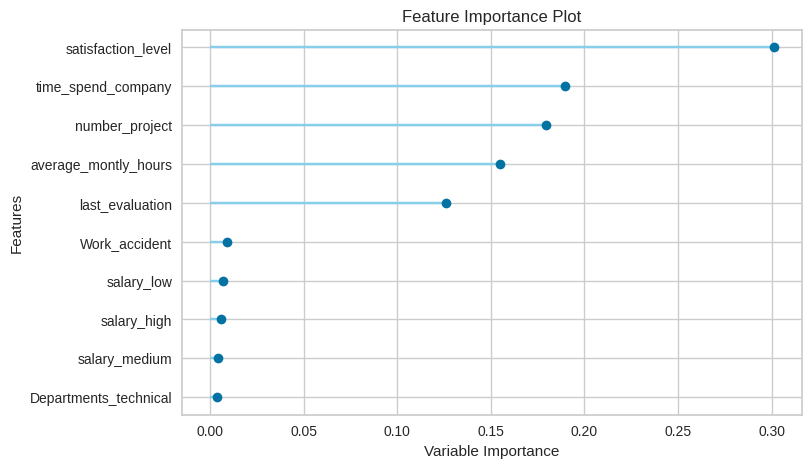

In [35]:
plot_model(rf_model, plot='feature')

In [36]:
#create a feature table
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_accounting',
       'Departments_support', 'Departments_technical',
       'Departments_sales', 'Departments_RandD', 'Departments_IT',
       'Departments_hr', 'Departments_product_mng',
       'Departments_marketing', 'Departments_management', 'salary_medium',
       'salary_low', 'salary_high'], dtype=object)

In [39]:
rf_model.feature_importances_

array([0.30110658, 0.1259243 , 0.17920058, 0.15511409, 0.18978115,
       0.0088762 , 0.0015364 , 0.00194865, 0.00290416, 0.00367545,
       0.00352838, 0.00186797, 0.00168919, 0.00183491, 0.00148181,
       0.00135336, 0.00152958, 0.00396984, 0.00693197, 0.00574544])

In [43]:
import pandas as pd
feature_table = pd.DataFrame(zip(rf_model.feature_names_in_,rf_model.feature_importances_),
                             columns=['feature','importance'])
feature_table

feature  importance
0        satisfaction_level    0.301107
1           last_evaluation    0.125924
2            number_project    0.179201
3      average_montly_hours    0.155114
4        time_spend_company    0.189781
5             Work_accident    0.008876
6     promotion_last_5years    0.001536
7    Departments_accounting    0.001949
8       Departments_support    0.002904
9     Departments_technical    0.003675
10        Departments_sales    0.003528
11        Departments_RandD    0.001868
12           Departments_IT    0.001689
13           Departments_hr    0.001835
14  Departments_product_mng    0.001482
15    Departments_marketing    0.001353
16   Departments_management    0.001530
17            salary_medium    0.003970
18               salary_low    0.006932
19              salary_high    0.005745

In [44]:
feature_table.to_gbq('employeedata.feature_table',
                     project_id,
                     chunksize=None,
                     if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7410.43it/s]
